In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn import linear_model

from disp import set_plot, colors, quiver
from kernels import make_psi_rand_sgm

$k(\mathbf{x}^*, \mathbf{x}) = \boldsymbol{\psi}(\mathbf{x}^*)^T\boldsymbol{\psi}(\mathbf{x})$

In [2]:
NTR = 100
G = 100
NS = [100, 500, 1000, 2000, 5000]

### RAND-SIG (10D)

In [3]:
D = 10

thetas = np.linspace(0, np.pi, 46)
dtheta = np.mean(np.diff(thetas))

ker_val_thry = 1 - thetas/np.pi

err_ints = np.nan*np.zeros(len(NS))

for cN, N in enumerate(NS):
    
    ker_vals = np.nan*np.zeros((NTR, len(thetas)))

    for ctheta, theta in enumerate(thetas):
        
        for ctr in range(NTR):
            J_PSI = G*np.random.randn(N, D)
            psi, ker = make_psi_rand_sgm(J_PSI)
            # sample two vectors separated by theta
            basis = stats.ortho_group.rvs(D)[:, :2]
            x = basis[:, 0]*np.random.uniform(.5, 2.5)
            x_star = (np.cos(theta)*basis[:, 0] + np.sin(theta)*basis[:, 1])*np.random.uniform(.5, 2.5)

            ker_vals[ctr, ctheta] = ker(x, x_star)
        
    if N == NS[2]:
        save_data = {'ker_vals': ker_vals.copy()}
        
    err_ints[cN] = np.sum((ker_vals[0] - ker_val_thry)**2)*dtheta
    
err_ints_10 = err_ints.copy()

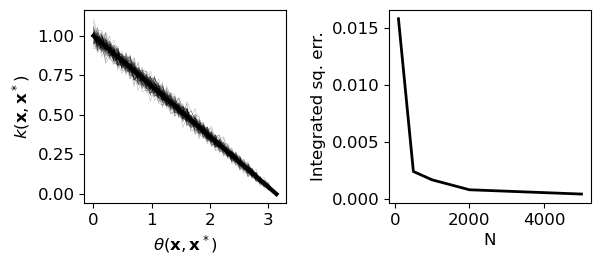

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(6, 2.75), tight_layout=True)

ker_vals = save_data['ker_vals']
colors = ['k', 'b']
axs[0].plot(thetas, ker_vals.T, c='k', lw=.2, alpha=.5, zorder=0)
axs[0].plot(thetas, ker_val_thry, c='k', lw=3, zorder=1)
    
set_plot(axs[0], x_label=r'$\theta(\mathbf{x}, \mathbf{x}^*)$', y_label=r'$k(\mathbf{x}, \mathbf{x}^*)$')
    
axs[1].plot(NS, err_ints, c='k', lw=2)
set_plot(axs[1], x_label='N', y_label='Integrated sq. err.')

### RAND-SIG (2D)

In [5]:
D = 2

thetas = np.linspace(0, np.pi, 46)
dtheta = np.mean(np.diff(thetas))

ker_val_thry = 1 - thetas/np.pi

err_ints = np.nan*np.zeros(len(NS))

for cN, N in enumerate(NS):
    
    ker_vals = np.nan*np.zeros((NTR, len(thetas)))

    for ctheta, theta in enumerate(thetas):
        
        for ctr in range(NTR):
            J_PSI = G*np.random.randn(N, D)
            psi, ker = make_psi_rand_sgm(J_PSI)
            # sample two vectors separated by theta
            basis = stats.ortho_group.rvs(D)[:, :2]
            x = basis[:, 0]*np.random.uniform(.5, 2.5)
            x_star = (np.cos(theta)*basis[:, 0] + np.sin(theta)*basis[:, 1])*np.random.uniform(.5, 2.5)

            ker_vals[ctr, ctheta] = ker(x, x_star)
        
    if N == NS[2]:
        save_data = {'ker_vals': ker_vals.copy()}
        
    err_ints[cN] = np.sum((ker_vals[0] - ker_val_thry)**2)*dtheta

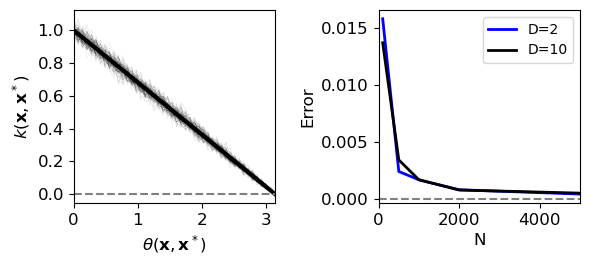

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(6, 2.75), tight_layout=True)

ker_vals = save_data['ker_vals']
colors = ['k', 'b']
axs[0].plot(thetas, ker_vals.T, c='k', lw=.2, alpha=.2, zorder=0)
axs[0].plot(thetas, ker_val_thry, c='k', lw=3, zorder=1)
axs[0].axhline(0, color='gray', ls='--')
    
set_plot(axs[0], x_lim=(0, np.pi), x_label=r'$\theta(\mathbf{x}, \mathbf{x}^*)$', y_label=r'$k(\mathbf{x}, \mathbf{x}^*)$')
    
axs[1].plot(NS, err_ints_10, c='b', lw=2)
axs[1].plot(NS, err_ints, c='k', lw=2)
axs[1].axhline(0, color='gray', ls='--')
set_plot(axs[1], x_lim=(0, NS[-1]), x_label='N', y_label='Error')
axs[1].legend(['D=2', 'D=10'])

fig.savefig('ms/2_rand_sig_kern_theory.svg')